In [2]:
import pandas as pd
import matplotlib.pyplot as plt

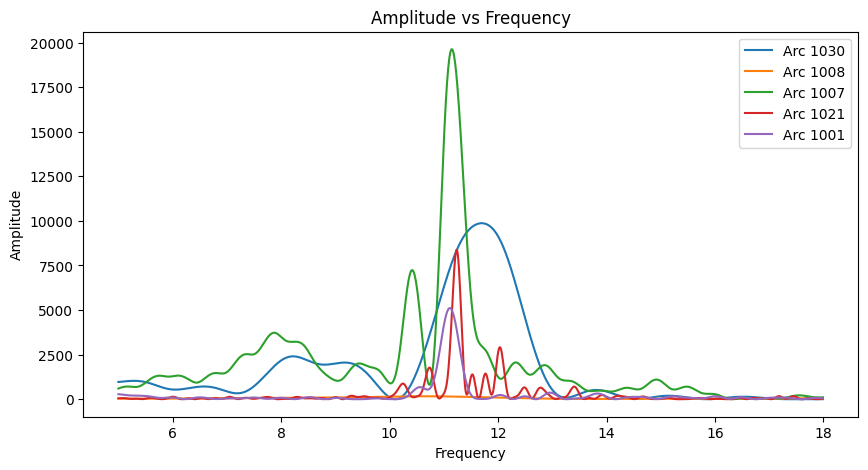

In [18]:
# Load the CSV files
arc_df = pd.read_csv('arc_freqs.csv')

# col 0 = id, col 1 = frequency, col 2 = amplitude
plt.figure(figsize=(10, 5))
for arc_id in arc_df['id'].unique():
    arc_data = arc_df[arc_df['id'] == arc_id]
    plt.plot(arc_data['frequency'], arc_data['amplitude'], label=f'Arc {arc_id}')

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.legend()
plt.show()

In [19]:
# Find the frequency with the highest amplitude per id
idx = arc_df.groupby('id')['amplitude'].idxmax()
max_amp_freqs = arc_df.loc[idx, ['id', 'frequency', 'amplitude','num']]

# Remove outliers from the frequencies using the IQR method
Q1 = max_amp_freqs['frequency'].quantile(0.25)
Q3 = max_amp_freqs['frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(max_amp_freqs)
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
max_amp_freqs = max_amp_freqs[(max_amp_freqs['frequency'] >= lower_bound) & (max_amp_freqs['frequency'] <= upper_bound)]
n_outliers = arc_df['id'].nunique() - max_amp_freqs['id'].nunique()
print(f"Removed {n_outliers} outliers")

# Calculate average and standard deviation of these frequencies
avg_freq = max_amp_freqs['frequency'].mean()
std_freq = max_amp_freqs['frequency'].std()

print(f"\nAverage frequency: {avg_freq:.4f}")
print(f"Standard deviation: {std_freq:.4f}")

        id  frequency     amplitude   num
5811  1001      11.11   5112.376364  2451
3215  1007      11.15  19628.792065  5665
1864  1008      10.64    165.551907   311
4524  1021      11.24   8379.732287  3955
670   1030      11.70   9871.555835  2485
Lower bound: 10.914999999999871, Upper bound: 11.434999999999867
Removed 2 outliers

Average frequency: 11.1667
Standard deviation: 0.0666


In [12]:
# Assuming arc_0_post and arc_0_pre are DataFrames with columns:
# 0: id, 1: snr, 2: elevation, 3: azimuth, 4: time

arc_0_post = pd.read_csv('arc_0_post.csv', header=None, names=['id', 'snr', 'elevation', 'azimuth', 'time'])
arc_0_pre = pd.read_csv('arc_0_pre.csv', header=None, names=['id', 'snr', 'elevation', 'azimuth', 'time'])


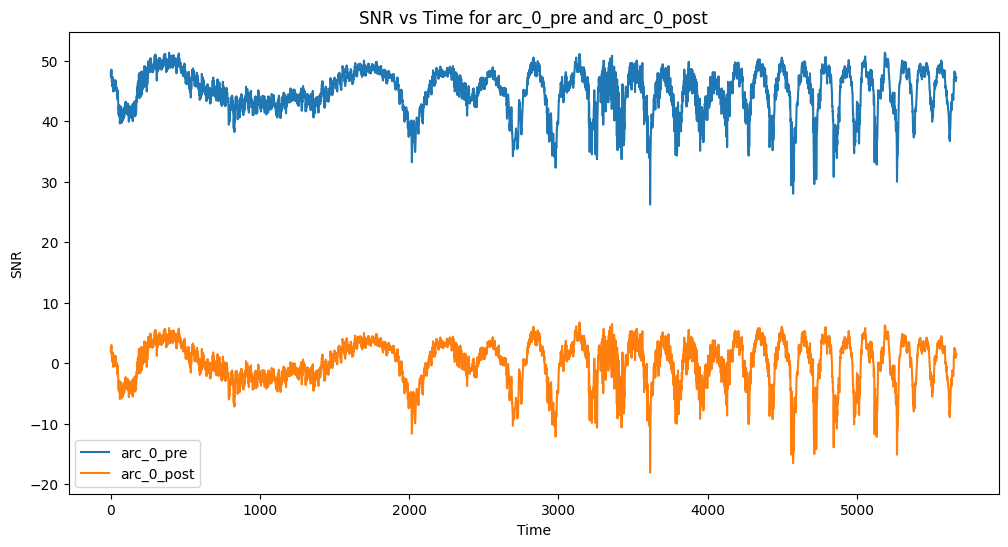

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(arc_0_pre['time'], arc_0_pre['snr'], label='arc_0_pre')
plt.plot(arc_0_post['time'], arc_0_post['snr'], label='arc_0_post')
plt.xlabel('Time')
plt.ylabel('SNR')
plt.title('SNR vs Time for arc_0_pre and arc_0_post')
plt.legend()
plt.show()

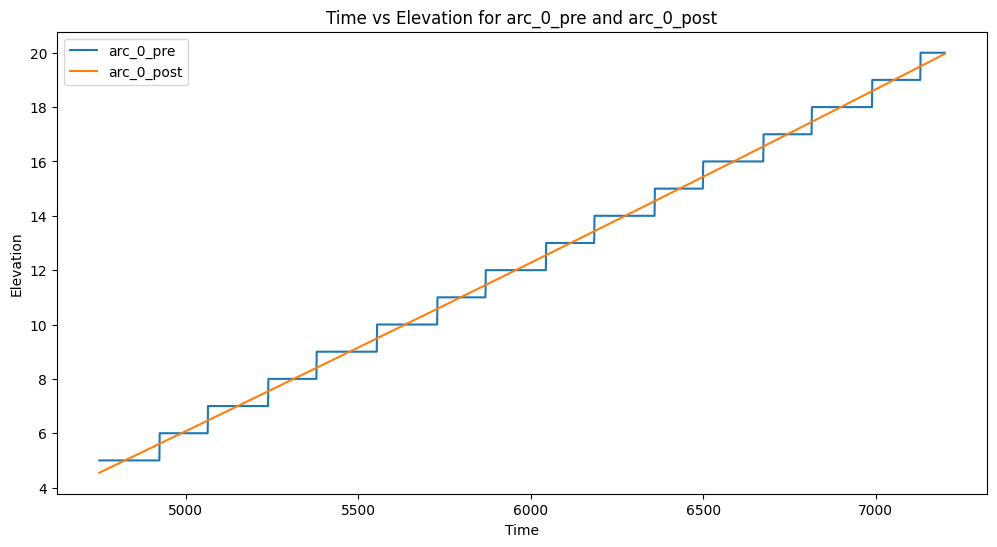

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(arc_0_pre['time'], arc_0_pre['elevation'], label='arc_0_pre')
plt.plot(arc_0_post['time'], arc_0_post['elevation'], label='arc_0_post')
plt.xlabel('Time')
plt.ylabel('Elevation')
plt.title('Time vs Elevation for arc_0_pre and arc_0_post')
plt.legend()
plt.show()